<a href="https://colab.research.google.com/github/lailynurazizah/Case-Study-04-Data-Mining-Kelompok-E/blob/main/Data_Mining_EDA_(test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Misal seorang Data Scientist ditugaskan 
untuk menentukan investasi properti 
terbaik.
* Tujuan analisanya adalah menemukan harga rumah yang lebih rendah dari harga pasaran
* Asumsikan kita memiliki data harga rumah yang ditawarkan dan variabel-variabel terkait lainnya.
* Untuk membuat keputusan investasi, kita akan melakukan EDA pada data yang ada.


# Data Import

In [3]:
import pandas as pd

In [4]:
file_ = "price.csv"
try:
  price = pd.read_csv(file_, low_memory=False, encoding='utf8')
except:
  !mkdir data
  price = pd.read_csv(file_, low_memory=False, encoding='utf8')

N, P = price.shape

In [5]:
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe variabel df = ", type(price))
price

baris =  936 , Kolom (jumlah variabel) =  10
Tipe variabel df =  <class 'pandas.core.frame.DataFrame'>


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [6]:
price.sample(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
353,354,8278.0,16251.0,13857.0,1455.0,1764.0,Covered,CAT A,390,8469000
172,173,3328.0,6678.0,9320.0,2044.0,2474.0,Open,CAT B,340,8034000
177,178,8738.0,12259.0,15087.0,1232.0,1487.0,Not Provided,CAT C,860,4980000
201,202,10083.0,13322.0,15167.0,1778.0,2148.0,Open,CAT A,1140,6994000
454,455,6669.0,11500.0,11948.0,1249.0,1503.0,Open,CAT A,950,6197000
725,726,10989.0,13153.0,13797.0,1645.0,1958.0,Covered,CAT B,530,9336000
829,830,7929.0,13867.0,14846.0,1349.0,1610.0,Open,CAT B,700,6589000
756,757,10496.0,13162.0,14686.0,1445.0,1734.0,Open,CAT B,900,2147000
773,774,8541.0,12045.0,14243.0,1534.0,1858.0,Open,CAT A,860,8837000
295,296,11017.0,8028.0,14703.0,1533.0,1848.0,Covered,CAT B,1070,5644000


In [7]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

# Sampling Training Data

In [8]:
df_train = price.sample(300)
df_train.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
226,227,5770.0,12932.0,13163.0,1604.0,1909.0,Open,CAT C,370,3373000
591,592,6237.0,10793.0,12774.0,1212.0,1440.0,Open,CAT B,500,6395000
787,788,12095.0,9405.0,14191.0,1250.0,1506.0,Covered,CAT B,990,6242000
311,312,9354.0,8578.0,10360.0,1142.0,1352.0,Not Provided,CAT C,710,3528000
413,414,7214.0,13739.0,13314.0,1209.0,1464.0,Covered,CAT C,600,3674000


In [11]:
print(df_train.loc[226,'Parking'])
df_train.loc[226]

Open


Observation          227
Dist_Taxi         5770.0
Dist_Market      12932.0
Dist_Hospital    13163.0
Carpet            1604.0
Builtup           1909.0
Parking             Open
City_Category      CAT C
Rainfall             370
House_Price      3373000
Name: 226, dtype: object

In [12]:
df_train.iloc[0]

Observation          227
Dist_Taxi         5770.0
Dist_Market      12932.0
Dist_Hospital    13163.0
Carpet            1604.0
Builtup           1909.0
Parking             Open
City_Category      CAT C
Rainfall             370
House_Price      3373000
Name: 226, dtype: object

In [13]:
df_test = price.loc[set(price.index) - set(df_train.index)]
print(df_test.shape)
df_test.head()

(636, 10)


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
7,8,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000


# Removing Variable(s)

In [14]:
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [15]:
price.drop("Observation", axis=1, inplace=True)
price.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


# Mengoreksi Tipe Variabel

In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [17]:
price.dtypes

Dist_Taxi        float64
Dist_Market      float64
Dist_Hospital    float64
Carpet           float64
Builtup          float64
Parking           object
City_Category     object
Rainfall           int64
House_Price        int64
dtype: object

In [18]:
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

# Statistika Deskriptif

In [19]:
price.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,923.000000,923.000000,935.000000,928.000000,921.000000,936.000000,9.360000e+02
mean,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,786.730769,6.089048e+06
std,2561.188953,2565.058074,2586.507654,789.370074,467.395372,266.218109,5.015046e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,600.000000,4.661000e+06
50%,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,780.000000,5.879500e+06
75%,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,970.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [20]:
price.describe(include='all')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,923.000000,923.000000,935.000000,928.000000,921.000000,936,936,936.000000,9.360000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,373,365,NaN,NaN
mean,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,NaN,NaN,786.730769,6.089048e+06
std,2561.188953,2565.058074,2586.507654,789.370074,467.395372,NaN,NaN,266.218109,5.015046e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,3.000000e+04
25%,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,NaN,NaN,600.000000,4.661000e+06
50%,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,NaN,NaN,780.000000,5.879500e+06
75%,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,NaN,NaN,970.000000,7.187250e+06


In [21]:
price[['Dist_Taxi','Parking']].describe(include='all')

,Dist_Taxi,Parking
count,923.000000,936
unique,NaN,4
top,NaN,Open
freq,NaN,373
mean,8239.512459,NaN
std,2561.188953,NaN
min,146.000000,NaN
25%,6481.500000,NaN
50%,8233.000000,NaN
75%,9967.000000,NaN


# Distribusi Nilai pada Setiap Variabel Kategorik

In [22]:
price['Parking'].unique()

['Open', 'Not Provided', 'Covered', 'No Parking']
Categories (4, object): ['Covered', 'No Parking', 'Not Provided', 'Open']

In [23]:
a = price['Parking']

In [24]:
dir(a)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__r

In [25]:
a.value_counts()

Open            373
Not Provided    230
Covered         188
No Parking      145
Name: Parking, dtype: int64

In [26]:
set(price['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

In [27]:
price['Parking'].value_counts()

Open            373
Not Provided    230
Covered         188
No Parking      145
Name: Parking, dtype: int64

Cara lain dengan menggunakan Fungsi Counter

In [28]:
from collections import Counter

In [29]:
Counter(price['Parking'])

Counter({'Open': 373, 'Not Provided': 230, 'Covered': 188, 'No Parking': 145})

In [30]:
a = [1,2,3,4,3,7,5,1,2,3,6]
Counter(a)

Counter({1: 2, 2: 2, 3: 3, 4: 1, 7: 1, 5: 1, 6: 1})

# Two-Way Tables

In [31]:
CT = pd.crosstab(index=price["City_Category"], columns=price["Parking"])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,75,51,82,122
CAT B,64,53,89,159
CAT C,49,41,59,92


# Data Grouping-Slicing

In [32]:
price[price["City_Category"] == "CAT B"].describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,358.000000,358.000000,365.000000,362.000000,358.000000,365.000000,3.650000e+02
mean,8101.061453,10713.675978,12880.435616,1565.709945,1831.016760,782.958904,5.919148e+06
std,2559.846491,2569.681709,2611.683801,1224.410669,649.957568,259.713517,7.675921e+06
min,604.000000,4950.000000,4922.000000,869.000000,1050.000000,0.000000,2.130000e+06
25%,6391.250000,8916.000000,11170.000000,1327.250000,1584.750000,590.000000,4.622000e+06
50%,8022.000000,10719.500000,12936.000000,1490.000000,1788.000000,770.000000,5.459000e+06
75%,9786.500000,12524.000000,14663.000000,1688.000000,2022.750000,960.000000,6.395000e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [33]:
price[price["Parking"].isin(["Open","Covered"])].describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,553.000000,553.000000,560.000000,555.000000,547.000000,561.000000,5.610000e+02
mean,8059.430380,10929.074141,12902.832143,1533.926126,1809.641682,800.338681,6.311734e+06
std,2617.056273,2546.474961,2512.450050,999.998159,554.337885,265.722854,6.323591e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,70.000000,3.000000e+04
25%,6209.000000,9154.000000,11263.750000,1321.500000,1592.500000,610.000000,4.773000e+06
50%,8081.000000,11008.000000,13056.500000,1490.000000,1787.000000,790.000000,6.024000e+06
75%,9858.000000,12616.000000,14576.750000,1659.000000,1983.500000,980.000000,7.399000e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


# Removing Duplicate Data

In [34]:
print(price.shape)
price.duplicated().sum()

(936, 9)


4

In [35]:
price[price.duplicated() == True]

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
932,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [36]:
price[price.duplicated(subset=['House_Price'])]

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
187,4917.0,7195.0,9468.0,1704.0,2032.0,Covered,CAT C,590,4830000
199,8704.0,13572.0,12349.0,1666.0,2000.0,Open,CAT C,480,3973000
213,10187.0,12921.0,13539.0,1321.0,1579.0,Covered,CAT B,770,6889000
240,6571.0,10429.0,11465.0,1350.0,1634.0,Open,CAT B,880,7712000
244,10612.0,8229.0,15696.0,1366.0,1649.0,Not Provided,CAT B,940,5278000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
932,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


# Slicing Data

In [37]:
numVar = price.select_dtypes(include = ['float64','int64']).columns
list(numVar)

['Dist_Taxi',
 'Dist_Market',
 'Dist_Hospital',
 'Carpet',
 'Builtup',
 'Rainfall',
 'House_Price']

In [38]:
price_num = price.select_dtypes(include = ['float64','int64'])
price_num.head()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


# Distribusi Nilai pada Setiap Variabel Kategorik

In [39]:
price_cat = price.select_dtypes(include = ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


In [40]:
for col in price_cat.columns:
    print(col,': ', set(price[col].unique()))

Parking :  {'No Parking', 'Not Provided', 'Open', 'Covered'}
City_Category :  {'CAT B', 'CAT A', 'CAT C'}


# Dummy Variable

In [41]:
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


# Concat dengan Data Awal

In [42]:
df2 = pd.concat([price, df], axis = 1)
df2.head().transpose() 

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Park_Covered,0,0,0,1,0


In [43]:
# Choosing some columns manually
X = price[['House_Price','Dist_Market']] 
X[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

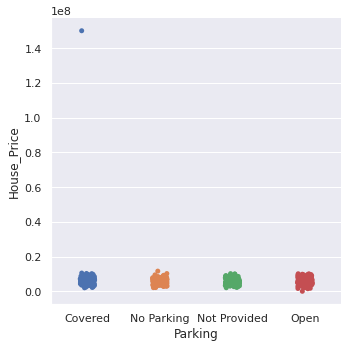

In [44]:
p= sns.catplot(x="Parking", y="House_Price", data=price)

In [45]:
# Terdapat outlier pada data, pada parkir covered harga rumah di atas rata2 sehingga data bagian rumah tsb dapat dibuang?

# Outlier

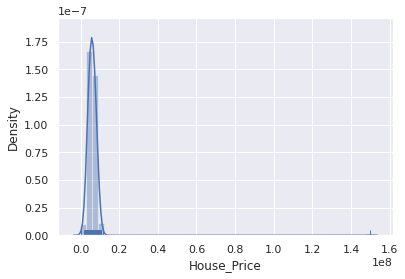

In [46]:
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [47]:
df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(936,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [48]:
price2 = price[df] # Data tanpa outliers
print(price2.shape, price.shape)

(935, 9) (936, 9)


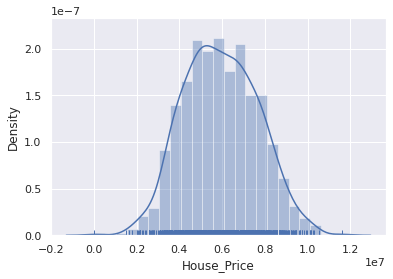

In [49]:
p = sns.distplot(price2['House_Price'], kde=True, rug=True)

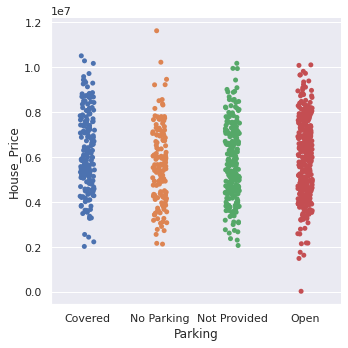

In [50]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)

In [51]:
# Terdapat data harga rumah dengan parking 'open' yang berasa di bawah pasaran harga sehingga kita dapat mempertimbangkan untuk mengambil tempat tersebut

# Missing Value

In [52]:
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [53]:
set(price2['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

In [54]:
(price2.isnull().sum()/len(price2)).to_frame('persentase missing')

,persentase missing
Dist_Taxi,0.013904
Dist_Market,0.013904
Dist_Hospital,0.001070
Carpet,0.008556
Builtup,0.016043
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [55]:
print(price.isnull().sum())
price.head()

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [56]:
price.fillna(price.mean())

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
931,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [57]:
## Exclude Missing Value

# Simplest solution, if the MV is not a lot
# drop rows with missing values : Ada berbagai cara
X = price.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
price2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
price2.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
price2.dropna(subset=['Dist_Hospital'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
price2.dropna(inplace=True)

In [58]:
print(price2.isnull().sum())


Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


In [59]:
# Saving the preprocessed Data for future use/analysis
price2.to_csv("data/price_PreProcessed.csv", encoding='utf8', index=False)

# Visualisasi

In [60]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import calendar, folium
from folium.plugins import HeatMap
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir?

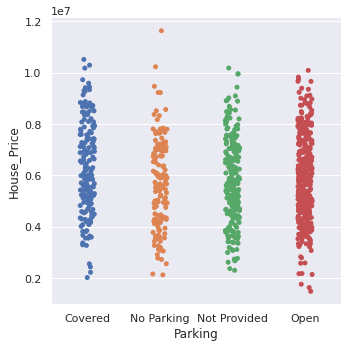

In [61]:
p= sns.catplot(x="Parking", y="House_Price", data=price2)

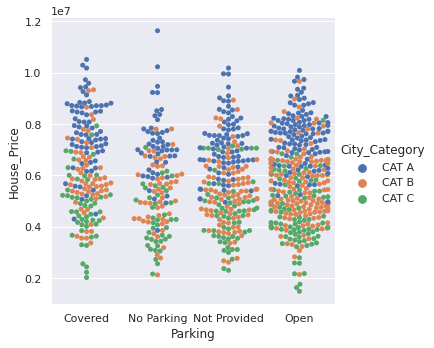

In [62]:
# Bisa juga plot dengan informasi dari 3 variabel sekaligus
# (untuk melihat kemungkinan faktor interaksi)
p= sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="swarm", data=price2)

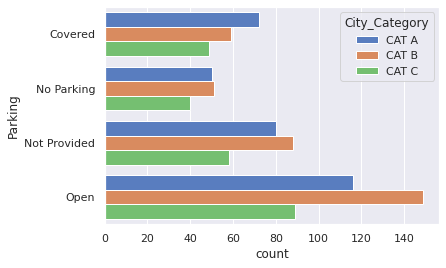

In [63]:
ax = sns.countplot(y = 'Parking', hue = 'City_Category', palette = 'muted', data=price2)

# Adding Labels

In [64]:
X = price2[price2["Parking"].isin(["Open","Covered"])]
X = X[X["House_Price"]<7000000]
X.groupby(["Parking", "City_Category"]).size().unstack()

City_Category,CAT A,CAT B,CAT C
Parking,,,
Covered,18,48,47
No Parking,0,0,0
Not Provided,0,0,0
Open,35,132,88


In [65]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

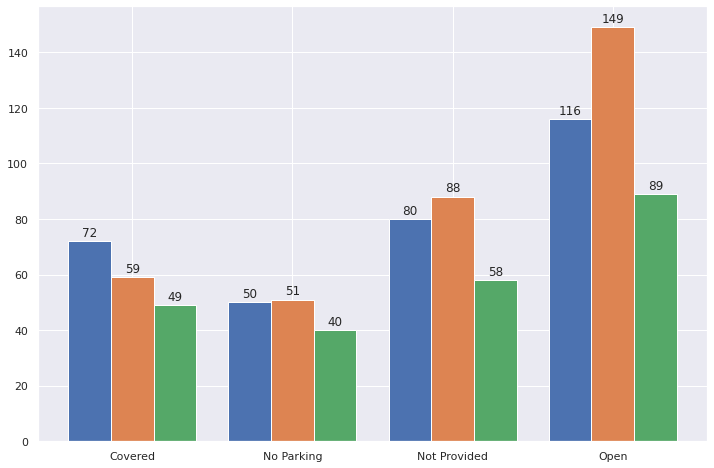

In [66]:
counts = price2.groupby(["Parking", "City_Category"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

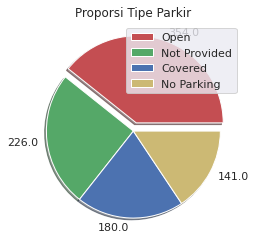

In [67]:
data = price2['Parking']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y']
labels = proporsion.keys()
explode = (0.1, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Tipe Parkir')
plt.legend(labels, loc='best')
plt.show()

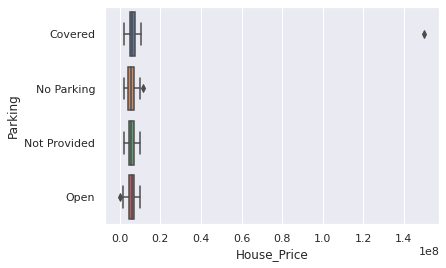

In [68]:
# Jika ada outlier grafiknya menjadi tidak jelas (data = price, bukan price2)
p = sns.boxplot(x="House_Price", y="Parking", data=price)

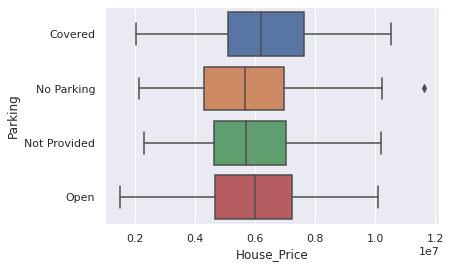

In [69]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

# Mendapatkan Data Outlier

In [70]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range. 
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

outliers_ = (price2['House_Price'] < (Q1 - 1.5 *IQR)) # Outlier bawah
rumah_potensial = price2.loc[outliers_]
rumah_potensial

Q1=4658000.0, Q3=7183000.0, IQR=2525000.0


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price


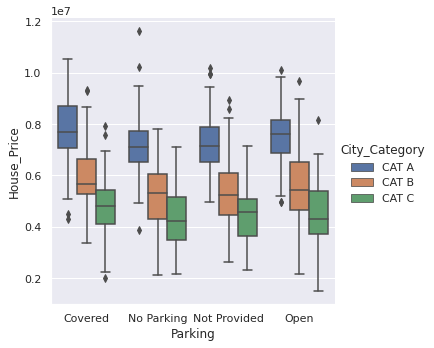

In [71]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)